<a href="https://colab.research.google.com/github/robertoarturomc/Visualizacion/blob/main/9_Graficando_informaci%C3%B3n_Geogr%C3%A1fica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 9. Graficando información Geográfica

Trabajar con información geográfica es distinto a trabajar con información tabular normal. Para empezar, tenemos un sistema de coordenadas, definidas por una *latitud* y *longitud*. No obstante, como espero que ya sepas, al pasar de un sistema esférico a uno plano (es decir, de una esfera, como nuestro planeta, a un mapa en 2D), inevitablemente habrás distorsiones.

Otro reto es que, como humanos, hemos creado un sinfin de divisiones. Tenemos países, estados, municipios, bloques de países, uniones económicas, en fin. ¿Es posible graficar ellas de forma semiautomática? ¿Qué herramientas existen?

## Trabajando con GeoPandas

GeoPandas es una librería de Python que tiene una altísima relación con Pandas. Tienen prácticamente el mismo funcionamiento, pero GeoPandas agrega la capacidad de trabajar con datos Geográficos.

Para poder hacerlo, necesitamos algo conocido como CRS: _Coordinate Reference System_, que convierte nuestras latitudes y longitudes (numéricas), a su relación que estas tienen y en dónde se ubican con respecto a nuestro planeta tierra.

En este caso, vamos a trabajar con una versión simplificada del Marco Geoestadístico del Inegi. Alternativamente, si quieres, puedes usar la versión completa...aunque pesa poco más de 3 GB.

[Descarga del Marco Geoestadístico del Inegi (simplificado)](http://jjsantoso.com/blog/datos/mapa_mexico.zip)

In [29]:
# ! pip install geopandas
import geopandas as gpd

In [145]:
# Leo la carpeta en donde está guardado mi Marco Geoestadístico
mx = gpd.read_file('/content/drive/MyDrive/VDD/mapa_mexico/mapa_mexico/')\
        .set_index('CLAVE')\
        .to_crs(epsg=4485) # Qué proyección utilizar al graficar.
mx.head()

,NOM_MUN,NOMEDO,CVE_EDO,CVE_MUNI,Area,geometry
CLAVE,,,,,,
02004,Tijuana,Baja California,02,004,1122.661145,"POLYGON ((-117.09481 32.41141, -117.09481 32.4..."
02003,Tecate,Baja California,02,003,3670.991923,"POLYGON ((-116.73791 32.56703, -116.65926 32.5..."
02002,Mexicali,Baja California,02,002,13119.275713,"POLYGON ((-115.81505 32.64088, -115.70466 32.6..."
02005,Playas de Rosarito,Baja California,02,005,517.120801,"POLYGON ((-117.06254 32.34436, -117.06276 32.3..."
26055,San Luis Rio Colorado,Sonora,26,055,9033.770278,"POLYGON ((-114.96166 32.36465, -114.96239 32.3..."


Nuestro GeoDataFrame tiene las columnas "AREA", "PERIMETER" y "geometry"; estas columnas son las que le dicen al intérprete dónde colocar las geometrías.

In [146]:
type(mx)

geopandas.geodataframe.GeoDataFrame

In [147]:
mx.Area.dtype

dtype('float64')

In [148]:
mx.geometry.dtype

Nuestro DataFrame actual sólo tiene guardada la información de los municipios, como en dónde se ubican y cuáles son sus límites. Podemos observar esa información al graficar.

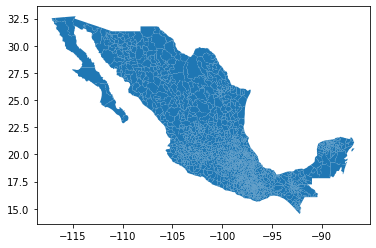

In [149]:
mx.plot()
plt.show()

Supongamos que queremos graficar alguna información que tenemos a nivel municipio. Por ejemplo, utilicemos información de los casos diarios de Covid en México: https://datos.covid-19.conacyt.mx/

In [38]:
covid = pd.read_csv("/content/drive/MyDrive/VDD/Casos_Diarios_Municipio_Confirmados_20230315.csv")
covid.head()

,cve_ent,poblacion,nombre,26-02-2020,27-02-2020,28-02-2020,29-02-2020,01-03-2020,02-03-2020,03-03-2020,...,06-03-2023,07-03-2023,08-03-2023,09-03-2023,10-03-2023,11-03-2023,12-03-2023,13-03-2023,14-03-2023,15-03-2023
0,16046,15290,Juarez,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16047,22358,Jungapeo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16048,5862,Lagunillas,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16049,18769,Madero,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5035,744247,Torreon,0,0,1,0,0,0,0,...,13,13,8,21,16,4,4,17,6,0


Como tenemos la información por día, sería interesante complementar est tabla. Por ejemplo, con la suma de casos totales detectados, así como la incidencia, que es el porcentaje de la población a la que se le ha detectado la enfermedad.

In [66]:
covid["total"] = covid.iloc[:, 3:].sum(axis=1)
covid["percent"] = covid["total"] / covid["poblacion"]

Ahora, vamos a cruzar (_join_) nuestras dos tablas. Para ello, a veces será necesario hacer unos cambios pequeños al formato que estas tienen.

In [67]:
mx.index = mx.index.astype("int")
mx.head()

,NOM_MUN,NOMEDO,CVE_EDO,CVE_MUNI,Area,geometry,CVE_ENT
CLAVE,,,,,,,
2004,Tijuana,Baja California,02,004,1122.661145,"POLYGON ((-73565.018 3602427.487, -73564.403 3...",02004
2003,Tecate,Baja California,02,003,3670.991923,"POLYGON ((-38995.078 3617846.589, -31557.921 3...",02003
2002,Mexicali,Baja California,02,002,13119.275713,"POLYGON ((48160.716 3621731.593, 58570.990 362...",02002
2005,Playas de Rosarito,Baja California,02,005,517.120801,"POLYGON ((-70946.724 3594803.753, -70966.034 3...",02005
26055,San Luis Rio Colorado,Sonora,26,055,9033.770278,"POLYGON ((127160.493 3587762.823, 127099.688 3...",26055


In [68]:
mx_covid = mx.merge(covid, left_index=True, right_on="cve_ent")
mx_covid.head()

,NOM_MUN,NOMEDO,CVE_EDO,CVE_MUNI,Area,geometry,CVE_ENT,cve_ent,poblacion,nombre,...,08-03-2023,09-03-2023,10-03-2023,11-03-2023,12-03-2023,13-03-2023,14-03-2023,15-03-2023,total,percent
439,Tijuana,Baja California,02,004,1122.661145,"POLYGON ((-73565.018 3602427.487, -73564.403 3...",02004,2004,1789531,Tijuana,...,44,19,29,1,1,44,13,0,145702,0.081419
438,Tecate,Baja California,02,003,3670.991923,"POLYGON ((-38995.078 3617846.589, -31557.921 3...",02003,2003,113857,Tecate,...,0,0,0,0,1,1,1,0,10914,0.095857
437,Mexicali,Baja California,02,002,13119.275713,"POLYGON ((48160.716 3621731.593, 58570.990 362...",02002,2002,1087478,Mexicali,...,33,37,21,5,1,39,8,0,120246,0.110573
440,Playas de Rosarito,Baja California,02,005,517.120801,"POLYGON ((-70946.724 3594803.753, -70966.034 3...",02005,2005,107859,Playas de Rosarito,...,0,3,1,1,0,1,0,0,10848,0.100576
248,San Luis Rio Colorado,Sonora,26,055,9033.770278,"POLYGON ((127160.493 3587762.823, 127099.688 3...",26055,26055,206982,San Luis Rio Colorado,...,8,13,15,4,4,13,3,0,23156,0.111874


Podemos hacer un pequeño Análisis Exploratorio. Por ejemplo, ¿Cómo se distribuye la Incidencia a nivel municipio?

[]

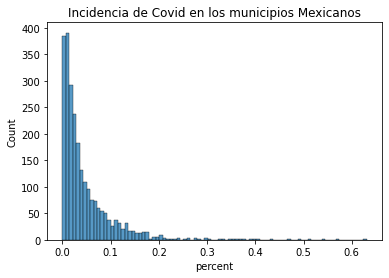

In [71]:
sns.histplot(mx_covid["percent"])
plt.title("Incidencia de Covid en los municipios Mexicanos")
plt.plot()

In [70]:
mx_covid["percent"].describe()

count    2480.000000
mean        0.046619
std         0.058558
min         0.000000
25%         0.011513
50%         0.026339
75%         0.060559
max         0.631050
Name: percent, dtype: float64

Ahora, ¿Hay alguna forma de representar toda esta información en un sólo gráfico? De preferencia en algún mapa, para poder observar la distribución total de casos...

## Cloropeth Graph

Es un tipo de gráfico en donde una variable numérica es representada con un color. Entre mayor sea el valor de esa escala numérica, más oscuro o claro será el color, y viceversa. Suelen ir de la mano de distintas categorías, de las cuáles, las divisiones políticas (estados, países, municipios, etc.) suelen ser las más comunes.

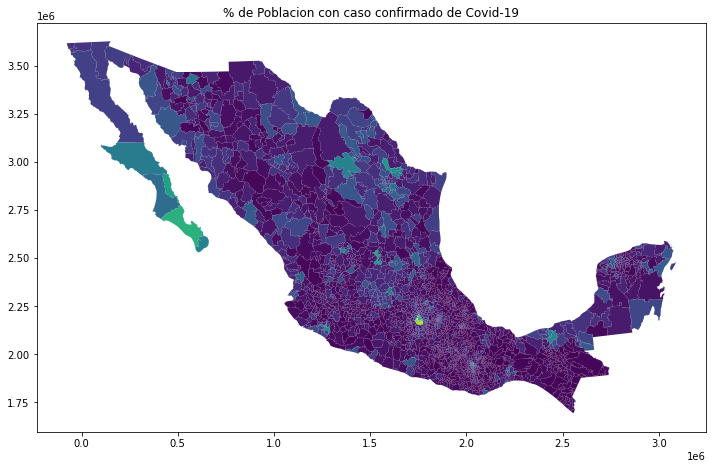

In [94]:
fig, ax = plt.subplots()

mx_covid.plot(column="percent", ax=ax)
fig.set_size_inches(12, 8)
plt.title("% de Poblacion con caso confirmado de Covid-19")

plt.show()

Como siempre, podemos mejorar mi gráfico. Por ejemplo, podemos separar mi espacio de dibujo en dos componentes: `fig`, y `ax`. El primero es mi *canvas*, el espacio total donde estoy graficando. El segundo, la colección de ejes en cuestión. 

Por limpieza (y porque no aportan nada realmente, puedo eliminar los ejes).

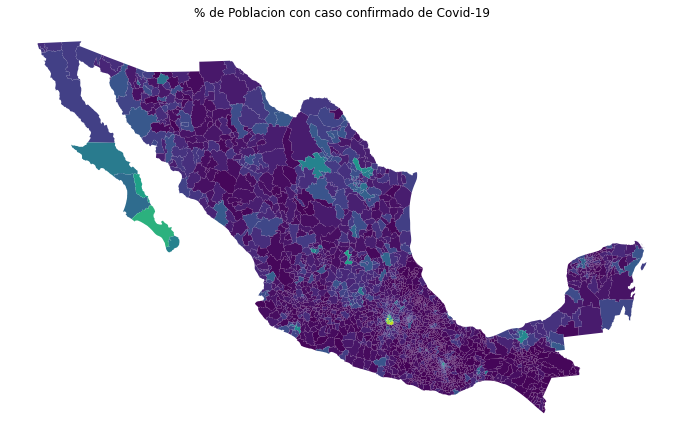

In [96]:
fig, ax = plt.subplots()

mx_covid.plot(column="percent", ax=ax)
fig.set_size_inches(12, 8)
ax.set_axis_off()
plt.title("% de Poblacion con caso confirmado de Covid-19")

plt.show()

También, es buena idea agregar una leyenda, que me diga qué representa cada color.



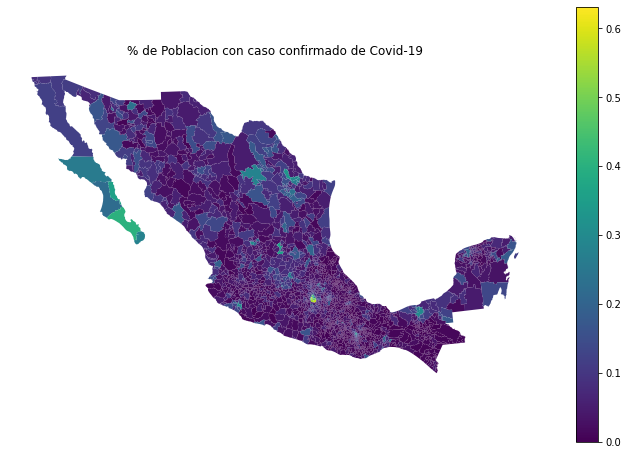

In [97]:
fig, ax = plt.subplots()

mx_covid.plot(column="percent", ax=ax, legend=True)
fig.set_size_inches(12, 8)
ax.set_axis_off()
plt.title("% de Poblacion con caso confirmado de Covid-19")

plt.show()

También, de ser necesario, puedo agregar un texto con `annotate`, que complemente mi gráfico.

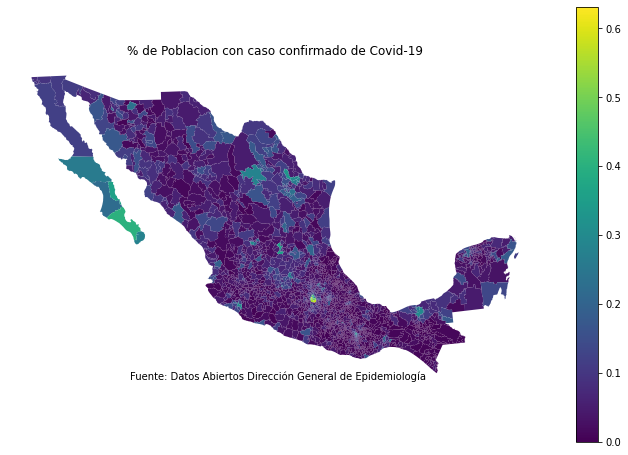

In [106]:
fig, ax = plt.subplots()

mx_covid.plot(column="percent", ax=ax, legend=True)
fig.set_size_inches(12, 8)
ax.set_axis_off()
plt.title("% de Poblacion con caso confirmado de Covid-19")
plt.annotate('Fuente: Datos Abiertos Dirección General de Epidemiología', xy=(0.15, 0.13),  xycoords='figure fraction')
plt.show()

Incluso, puedo sobreponer otro gráfico u elementos adicionales. Por ejemplo, puedo buscar el municipio de "Puebla" y colorearlo de rojo, para resaltarlo en el mapa.

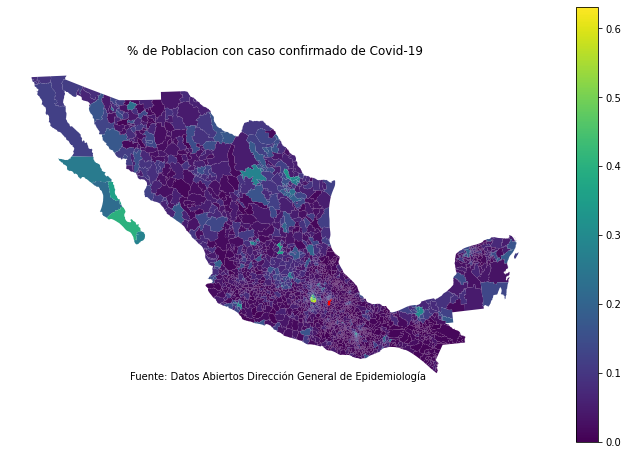

In [138]:
fig, ax = plt.subplots()

mx_covid.plot(column="percent", ax=ax, legend=True)
mx_covid[mx_covid["NOM_MUN"].str.contains("Puebla")].plot(ax=ax, color="red")

fig.set_size_inches(12, 8)
ax.set_axis_off()
plt.title("% de Poblacion con caso confirmado de Covid-19")
plt.annotate('Fuente: Datos Abiertos Dirección General de Epidemiología', xy=(0.15, 0.13),  xycoords='figure fraction')

plt.show()